To Do List:
Normalize/remove numbers, include stemming, leminization
Shrink down data set to use in models
have accurated models in corelation with the dataset
Do powerpoint 
Write paper


In [1]:
#

# Import PyDrive and associated libraries
# This only needs to be done once per notebook
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
# This only needs to be done once per notebook
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:

import pandas as pd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth

# Download a file based on its file ID.

# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
#file_id = '18vQ1fMpdl7JT1wsAe1y65UKxNbc3ZGcE' # Check your own ID in GDrive
#downloaded = drive.CreateFile({'id': file_id})

# Save file in Colab memory
#downloaded.GetContentFile('/content/twitter_racism_parsed_dataset.csv')  

df= pd.read_csv('/content/twitter_racism_parsed_dataset.csv', sep='\t', error_bad_lines=False)
df= pd.read_csv('/content/twitter_racism_parsed_dataset.csv', sep='\t', error_bad_lines=False)

df.head()


index,id,Text,Annotation,oh_label
0  5.76749336190525E+017,5.76749336190525E+017,@A...
1  5.40890533389161E+017,5.40890533389161E+017,@T...
2  5.67843320338125E+017,5.67843320338125E+017,@j...
3  5.76646151631327E+017,5.76646151631327E+017,"F...
4  5.71349195610681E+017,5.71349195610681E+017,@c...

Raw Text

In [3]:
df= pd.read_csv('/content/twitter_racism_parsed_dataset.csv')
df.head()

index            id  ... Annotation oh_label
0  5.767493e+17  5.767493e+17  ...     racism        1
1  5.408905e+17  5.408905e+17  ...       none        0
2  5.678433e+17  5.678433e+17  ...     racism        1
3  5.766462e+17  5.766462e+17  ...       none        0
4  5.713492e+17  5.713492e+17  ...       none        0

[5 rows x 5 columns]

In [4]:
print("Number of tweets: {}".format(len(df)))

Number of tweets: 13471


In [5]:
import nltk #natural language
nltk.download("stopwords")#Common words in the english language that dont have the classification of text words that dont matter


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
import re
import nltk
import string
from nltk.corpus import stopwords
nltk.download('punkt')
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [7]:
pd.set_option("display.max_colwidth",100)# Display column width
stopwords=nltk.corpus.stopwords.words('english')
ps=nltk.PorterStemmer()

In [8]:
st=string.punctuation #variable for puncutation

Plot: understanding and representing how tweets or messages are distributed over data set

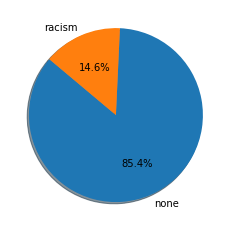

In [9]:
import matplotlib.pyplot as plt

sentiment_count = df['Annotation'].value_counts()
plt.pie(sentiment_count, labels=sentiment_count.index,
          autopct='%.1f%%', shadow=True, startangle=140)
plt.show()

In [10]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Text Normalization: Capitolization, punctuation, Tokenizing, stemming and removing stop words

In [79]:
def clean_text(text):
  text="".join([word.lower() for word in text if word not in string.punctuation])
  tokens=re.split('\W+', text)
  text=[ps.stem(word) for word in tokens if word not in stopwords]


  return text

df['clean_text'] = df['Text'].apply(lambda x: clean_text(x))
df['clean_text'].head()

0      [aalwuhaib1977, muslim, mob, violenc, hindu, bangladesh, continu, 2014, islam, httptcoc1jbwjwurc]
1                                                                      [te4mnightm4r, httptco5ih7mkdbqg]
2    [jncatron, israjourisra, ampalestin, islamophobia, like, idea, naziphobia, islam, religion, hate...
3                               [final, im, caught, sudden, death, cook, look, like, gonna, intens, mkr]
4                                                                     [carolinesind, herecomesfran, hug]
Name: clean_text, dtype: object

Apply the count Vecterorizer; convert words in to numbers


In [12]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect=CountVectorizer(analyzer=clean_text)
X_counts=count_vect.fit_transform(df['Text'])
print(X_counts.shape)
print(count_vect.get_feature_names())

(13471, 17064)
['', '0', '000', '01151900', '02', '05', '06jank', '0rwellian', '0xabad1dea', '0xjare', '1', '10', '100', '1000', '10000', '100000', '100000000', '10000teamsleft', '10000x', '1000x', '100k', '100lb', '100month', '100th', '100x', '101', '1010', '1018', '102', '103', '10324830m', '104', '107', '109', '10hr', '10month', '10thousandstepsagain', '10yearold', '11', '110', '1100', '11101903', '115', '117', '12', '120', '120dollarsfood', '1220', '1230', '1233', '12h', '12k', '12year', '12yearold', '12yrold', '13', '1313lilhad', '133', '133133', '14', '140', '1400', '143m', '14600', '14k', '14th', '14yearold', '15', '150', '1500', '150000', '1519', '155', '1561', '157', '15720', '15km', '15ntc', '15th', '16', '1600', '1611', '168', '17', '1700', '17000', '17ok', '17snelson', '18', '180', '1800', '18000', '1801', '184', '19', '19312015', '194', '1947', '1948', '1950', '19597', '1959greenarrow', '1965', '1980', '1987', '1994', '1997', '1999', '1d', '1fatoshn', '1gb', '1hr', '1k', '

In [13]:
#apply to small sample

data_sample= df[0:20]
count_vect_sample=CountVectorizer(analyzer=clean_text)
X_counts_sample=count_vect_sample.fit_transform(data_sample['Text'])
print(X_counts_sample.shape)
print(count_vect.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(20, 179)
['', '0', '000', '01151900', '02', '05', '06jank', '0rwellian', '0xabad1dea', '0xjare', '1', '10', '100', '1000', '10000', '100000', '100000000', '10000teamsleft', '10000x', '1000x', '100k', '100lb', '100month', '100th', '100x', '101', '1010', '1018', '102', '103', '10324830m', '104', '107', '109', '10hr', '10month', '10thousandstepsagain', '10yearold', '11', '110', '1100', '11101903', '115', '117', '12', '120', '120dollarsfood', '1220', '1230', '1233', '12h', '12k', '12year', '12yearold', '12yrold', '13', '1313lilhad', '133', '133133', '14', '140', '1400', '143m', '14600', '14k', '14th', '14yearold', '15', '150', '1500', '150000', '1519', '155', '1561', '157', '15720', '15km', '15ntc', '15th', '16', '1600', '1611', '168', '17', '1700', '17000', '17ok', '17snelson', '18', '180', '1800', '18000', '1801', '184', '19', '19312015', '194', '1947', '1948', '1950', '19597', '1959greenarrow', '1965', '1980', '1987', '1994', '1997', '1999', '1d', '1fatoshn', '1gb', '1hr', '1k', '1lbca

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Vectorizers output sparse matrices

In [14]:
X_counts_sample

<20x179 sparse matrix of type '<class 'numpy.int64'>'
	with 199 stored elements in Compressed Sparse Row format>

In [15]:
#DataFrame to convert to matrixies
X_count_df=pd.DataFrame(X_counts_sample.toarray())
X_count_df

0    1    2    3    4    5    6    ...  172  173  174  175  176  177  178
0     1    0    0    0    1    0    0  ...    0    0    0    0    0    0    0
1     0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
2     0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
3     0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
4     0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
5     0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
6     0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
7     0    0    0    0    0    0    1  ...    0    0    0    0    0    0    0
8     0    1    0    0    0    0    0  ...    0    0    0    0    0    1    0
9     0    0    1    1    0    0    0  ...    0    0    0    0    0    0    1
10    0    0    0    0    0    0    0  ...    0    0    0    1    0    0    0
11    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
12    0    0    0    0    0    0    0  ...    0    0    1    0    1    0    0
13    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
14    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
15    0    0    0    0    0    1    0  ...    0    1    0    0    0    0    0
16    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
17    0    0    0    0    0    0    0  ...    0    0    1    0    0    0    0
18    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
19    0    0    0    0    0    0    0  ...    1    0    0    0    0    0    0

[20 rows x 179 columns]

In [16]:
#get features shows number of unique words to see how many times the word appears
X_count_df.columns=count_vect_sample.get_feature_names()
X_count_df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


2014  23  7  9  aalwuhaib1977  ...  want  watan71969  woman  writer  year
0      1   0  0  0              1  ...     0           0      0       0     0
1      0   0  0  0              0  ...     0           0      0       0     0
2      0   0  0  0              0  ...     0           0      0       0     0
3      0   0  0  0              0  ...     0           0      0       0     0
4      0   0  0  0              0  ...     0           0      0       0     0
5      0   0  0  0              0  ...     0           0      0       0     0
6      0   0  0  0              0  ...     0           0      0       0     0
7      0   0  0  0              0  ...     0           0      0       0     0
8      0   1  0  0              0  ...     0           0      0       1     0
9      0   0  1  1              0  ...     0           0      0       0     1
10     0   0  0  0              0  ...     0           1      0       0     0
11     0   0  0  0              0  ...     0           0      0       0     0
12     0   0  0  0              0  ...     1           0      1       0     0
13     0   0  0  0              0  ...     0           0      0       0     0
14     0   0  0  0              0  ...     0           0      0       0     0
15     0   0  0  0              0  ...     0           0      0       0     0
16     0   0  0  0              0  ...     0           0      0       0     0
17     0   0  0  0              0  ...     1           0      0       0     0
18     0   0  0  0              0  ...     0           0      0       0     0
19     0   0  0  0              0  ...     0           0      0       0     0

[20 rows x 179 columns]

Vectorizing Raw Data:N-Grams

N-Gram create a document-term matrix where counts still occupy the cell but instead of the columns representing single terms, they represent all combination of adjancent words of length n in your text

In [17]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
#df.columns=['Text', 'Annotation']
#stemmer = PorterStemmer()
#for word in text: 
    #stemmer.stem(text)
def clean_text(text):
  text="".join([word.lower() for word in text if word not in string.punctuation])
  tokens=re.split('\W+', text)
  tokens=re.split('(http|https):\/\/\S+', text)
  text=" ".join([ps.stem(word) for word in tokens if word not in stopwords])
  tokens = re.split('#+', text)#remove hashtag
  tokens = re.split('(http|https):\/\/\S+',  text)
  tokens = re.split('@\S+', text)
  #tokens = re.sub(r'\d+', clean_text, text)
  #tokens = re.sub(r'\w*\d+\w*', clean_text, text)
  return text


  

df['clean_text'] = df['Text'].apply(lambda x: clean_text(x))
df.head()


index  ...                                                                                           clean_text
0  5.767493e+17  ...  aalwuhaib1977 muslim mob violence against hindus in bangladesh continues in 2014 islam httptcoc1...
1  5.408905e+17  ...                                                                      te4mnightm4re httptco5ih7mkdbqg
2  5.678433e+17  ...  jncatron israjourisra ampalestine islamophobia is like the idea of naziphobia islam is a religio...
3  5.766462e+17  ...          finally im all caught up and that sudden death cook off looks like its gonna be intense mkr
4  5.713492e+17  ...                                                                    carolinesinders herecomesfran hug

[5 rows x 6 columns]

Apply CountVectorizer (w/NGrams)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

ngram_vect=CountVectorizer(ngram_range=(2,2))#bigram accuracy of words or context based of 2 words surounding
x_counts=ngram_vect.fit_transform(df['clean_text'])
print(x_counts.shape)
print(ngram_vect.get_feature_names())

(13471, 102048)
['000 mkr', '01151900 soon', '02 feb', '05 sb', '06jank patrickosgood', '0rwellian labor', '0xabad1dea bm', '0xabad1dea but', '0xabad1dea certain', '0xabad1dea httptcoxtgw1hmrn1', '0xabad1dea kelseytheodore2', '0xabad1dea sorry', '0xabad1dea the', '0xabad1dea these', '0xabad1dea unless', '0xabad1dea was', '0xabad1dea wat', '0xabad1dea you', '0xjared mmmyers', '0xjared zython86', '10 as', '10 exampl', '10 from', '10 here', '10 km', '10 male', '10 minutes', '10 mkr', '10 moment', '10 months', '10 more', '10 movie', '10 of', '10 right', '10 standup', '10 under', '10 unless', '10 weeks', '10 words', '10 year', '10 years', '10 yr', '100 about', '100 accurate', '100 billion', '100 by', '100 certain', '100 circlejerk', '100 crowdfund', '100 daesh', '100 day', '100 female', '100 guarantee', '100 ignorant', '100 islam', '100 islamic', '100 islamist', '100 large', '100 li', '100 liar', '100 lie', '100 millitants', '100 mkr', '100 muslim', '100 not', '100 of', '100 operating', '10

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Smaller Sample

In [19]:
df_sample=df[0:20]
#bigram
ngram_vect_sample=CountVectorizer(ngram_range=(2,2))
x_counts_sample=ngram_vect_sample.fit_transform(df_sample['clean_text'])
print(x_counts_sample.shape)
print(ngram_vect_sample.get_feature_names())


(20, 295)
['2014 islam', '23 of', 'aalwuhaib1977 muslim', 'about how', 'about it', 'about to', 'advice mkr', 'against hindus', 'aligharib maxblumenthal', 'all caught', 'all the', 'amazing advice', 'amp excuse', 'ampalestine islamophobia', 'an even', 'and conquered', 'and it', 'and that', 'and they', 'any christian', 'approach is', 'approve of', 'arabs were', 'are about', 'are you', 'as isis', 'as soon', 'athenahollow twoscooters', 'aymannathem as', 'bangladesh continues', 'be intense', 'be outlaw', 'before any', 'better idea', 'blades on', 'bliss httptcoekwnullxjc', 'blowing my', 'blunted by', 'bullshit mkr', 'but shes', 'by putting', 'by steroids', 'carolinesinders herecomesfran', 'caught up', 'chased all', 'christian crusades', 'christiandom before', 'churner feels', 'classist he', 'competition what', 'completely dismiss', 'conquered 23', 'continues in', 'cook off', 'cool next', 'crimes of', 'crusades in', 'death cook', 'discernment blunted', 'do you', 'dont tend', 'drugs from', 'duc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


TF-IDF Equation-Time Frequency Inverse Document Frequency shows how important a word is in a text message

Percentage of time a word appears in a text messages

In [20]:
#def clean_text(text):
  #text="".join([word.lower() for word in text if word not in string.punctuation])
  #tokens=re.split('\W+', text)
  #text=" ".join([ps.stem(word) for word in tokens if word not in stopwords])
  #return text
def clean_text(text):
  #text = [[words for words in sentences.lower().split()] for sentences in data]
  text="".join([word.lower() for word in text if word not in string.punctuation])

  tokens=re.split('\W+', text)
  #text = [words for words in sentences.lower().split()] for sentences in data]
  text=([ps.stem(word) for word in tokens if word not in stopwords])
  return text
  

Apply TfidVectorizer

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect=TfidfVectorizer(analyzer=clean_text)
x_tfidf=tfidf_vect.fit_transform(df['clean_text'])
print(x_tfidf.shape)
print(tfidf_vect.get_feature_names())

(13471, 17304)
['', '0', '000', '01151900', '02', '05', '06jank', '0rwellian', '0xabad1dea', '0xjare', '1', '10', '100', '1000', '10000', '100000', '100000000', '10000teamsleft', '10000x', '1000x', '100k', '100lb', '100month', '100th', '100x', '101', '1010', '1018', '102', '103', '10324830m', '104', '107', '109', '10hr', '10month', '10thousandstepsagain', '10yearold', '11', '110', '1100', '11101903', '115', '117', '12', '120', '120dollarsfood', '1220', '1230', '1233', '12h', '12k', '12year', '12yearold', '12yrold', '13', '1313lilhad', '133', '133133', '14', '140', '1400', '143m', '14600', '14k', '14th', '14yearold', '15', '150', '1500', '150000', '1519', '155', '1561', '157', '15720', '15km', '15ntc', '15th', '16', '1600', '1611', '168', '17', '1700', '17000', '17ok', '17snelson', '18', '180', '1800', '18000', '1801', '184', '19', '19312015', '194', '1947', '1948', '1950', '19597', '1959greenarrow', '1965', '1980', '1987', '1994', '1997', '1999', '1d', '1fatoshn', '1gb', '1hr', '1k', '

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Apply smaller sammple

In [22]:
df_sample=df[0:20]
tfidf_vect_sample=TfidfVectorizer(analyzer=clean_text)
x_tfidf_sample=tfidf_vect_sample.fit_transform(df_sample['Text'])
print(x_tfidf_sample.shape)
print(tfidf_vect_sample.get_feature_names())

(20, 179)
['2014', '23', '7', '9', 'aalwuhaib1977', 'advic', 'aligharib', 'amaz', 'amp', 'ampalestin', 'approach', 'approv', 'arab', 'athenahollow', 'aymannathem', 'bangladesh', 'better', 'blade', 'bliss', 'blow', 'blunt', 'bullshit', 'carolinesind', 'caught', 'chase', 'christian', 'christiandom', 'churner', 'classist', 'competit', 'complet', 'conquer', 'continu', 'cook', 'cool', 'crime', 'crusad', 'dead', 'death', 'die', 'discern', 'dismiss', 'dont', 'drug', 'duck', 'dylanw', 'egypt', 'egyptian', 'erdogan', 'even', 'excus', 'fat', 'feel', 'figur', 'final', 'foot', 'front', 'fuck', 'geekyzekey', 'geniu', 'get', 'girl', 'glad', 'gonna', 'got', 'gt', 'guy', 'hadi', 'hadith', 'hand', 'happi', 'hate', 'heat', 'herecomesfran', 'hindu', 'httptco3me3nrk8xz', 'httptco5ih7mkdbqg', 'httptcoc1jbwjwurc', 'httptcoekwnullxjc', 'httptcoesw23u0b2v', 'httptcoyakik5pjyj', 'huffpostrelig', 'hug', 'idea', 'im', 'info', 'intens', 'invad', 'isi', 'islam', 'islamophobia', 'israjourisra', 'jncatron', 'judg', 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Vecotrize output sparse matricies

In [23]:
x_tfidf_df=pd.DataFrame(x_tfidf_sample.toarray())#turn sample into array
x_tfidf_df.columns=tfidf_vect_sample.get_feature_names()#get feature names and show percentage of importance of word or how often the word is used
x_tfidf_df
#computer percentage of time the word appears

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


2014        23         7  ...     woman    writer      year
0   0.327902  0.000000  0.000000  ...  0.000000  0.000000  0.000000
1   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
2   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
3   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
4   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
5   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
6   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
7   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
8   0.000000  0.308197  0.000000  ...  0.000000  0.308197  0.000000
9   0.000000  0.000000  0.283389  ...  0.000000  0.000000  0.283389
10  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
11  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
12  0.000000  0.000000  0.000000  ...  0.282331  0.000000  0.000000
13  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
14  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
15  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
16  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
17  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
18  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
19  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000

[20 rows x 179 columns]

Featured Engineering
The process of creating new features or transforming existing features to get the most out of your data

  Creating new features
  1.Length of text field
  2.Percentage of characters that are punctuation in the text
  3.Percentage of characters are capitolize

In [24]:
df= pd.read_csv('/content/twitter_racism_parsed_dataset.csv')


In [25]:
def clean_text(text):
  text="".join([word.lower() for word in text if word not in string.punctuation])
  tokens=re.split('\W+', text)
  tokens=re.split('(http|https):\/\/\S+', text)
  text=" ".join([ps.stem(word) for word in tokens if word not in stopwords])
  tokens = re.split('#+', text)#remove hashtag
  tokens = re.split('(http|https):\/\/\S+',  text)
  tokens = re.split('@\S+', text)
  #tokens = re.sub(r'\d+', clean_text, text)
  #tokens = re.sub(r'\w*\d+\w*', clean_text, text)
  return text


  

#df['clean_text'] = df['Text'].apply(lambda x: clean_text(x))
df.head()


index            id  ... Annotation oh_label
0  5.767493e+17  5.767493e+17  ...     racism        1
1  5.408905e+17  5.408905e+17  ...       none        0
2  5.678433e+17  5.678433e+17  ...     racism        1
3  5.766462e+17  5.766462e+17  ...       none        0
4  5.713492e+17  5.713492e+17  ...       none        0

[5 rows x 5 columns]

Pencentage of Text thats punctuation

In [26]:
df['body_len']=df['Text'].apply(lambda x:len(x)-x.count(''))
df.head()

index            id  ... oh_label body_len
0  5.767493e+17  5.767493e+17  ...        1       -1
1  5.408905e+17  5.408905e+17  ...        0       -1
2  5.678433e+17  5.678433e+17  ...        1       -1
3  5.766462e+17  5.766462e+17  ...        0       -1
4  5.713492e+17  5.713492e+17  ...        0       -1

[5 rows x 6 columns]

In [27]:
import string

def count_punct(text):
  count=sum([1 for char in text if char in string.punctuation])
  return round(count/(len(text)-text.count('  ')), 3)*100     #percentage of text messagees that are punctation

df['punct%']= df['Text'].apply(lambda x: count_punct(x))

df.head()

index            id  ... body_len punct%
0  5.767493e+17  5.767493e+17  ...       -1    7.1
1  5.408905e+17  5.408905e+17  ...       -1   18.4
2  5.678433e+17  5.678433e+17  ...       -1    4.4
3  5.766462e+17  5.766462e+17  ...       -1    4.2
4  5.713492e+17  5.713492e+17  ...       -1   10.5

[5 rows x 7 columns]

Evaluating Created Features
If cyberbullying or racism has less punctuation

In [28]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

Building Histogram for Body_len

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location ' upper left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


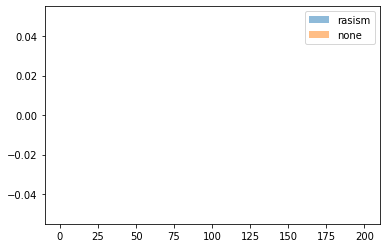

In [81]:
bins = np.linspace(0, 200, 40)#creates a graph of the length of racism and none if there was a hypothesis  that racism messages are shorter than non racism 
#looking for the rows that have racism in the body_len column

pyplot.hist(df[df['oh_label']=='1']['body_len'], bins, alpha=0.5, label='rasism')
pyplot.hist(df[df['oh_label']=='0']['body_len'], bins, alpha=0.5, label='none')
pyplot.legend(loc=' upper left')
pyplot.show()


Histogram for punctuation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Unrecognized location ' upper left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  """


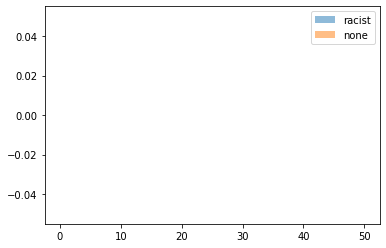

In [82]:
bins = np.linspace(0, 50, 40)#graph of the percentage of puntuation in racism and percentage of punctuation for non

pyplot.hist(df[df['oh_label']=='1']['punct%'], bins, alpha=0.5, label='racist')
pyplot.hist(df[df['oh_label']=='0']['punct%'], bins, alpha=0.5, label='none')
pyplot.legend(loc=' upper left')
pyplot.show()


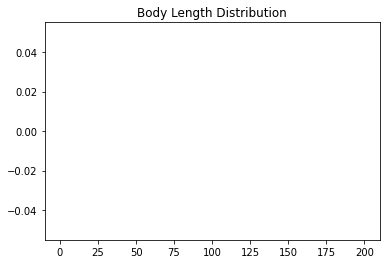

In [31]:
bins = np.linspace(0,200,40)#graph of the body_len through the data

pyplot.hist(df['body_len'], bins)
pyplot.title('Body Length Distribution')
pyplot.show()

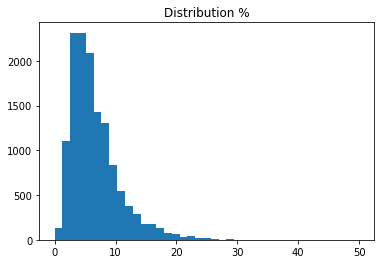

In [32]:
bins = np.linspace(0,50,40)#graph of punctuation percentage through the data

pyplot.hist(df['punct%'], bins)
pyplot.title('Distribution %')
pyplot.show()

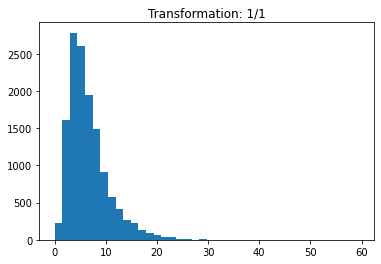

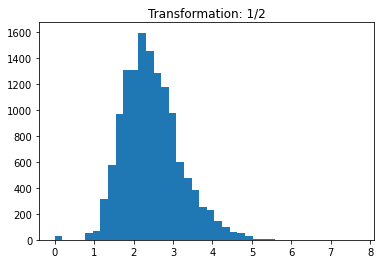

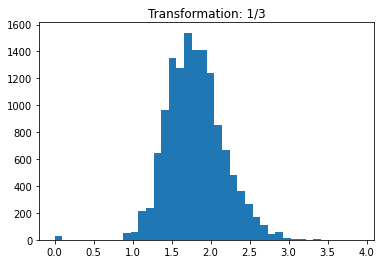

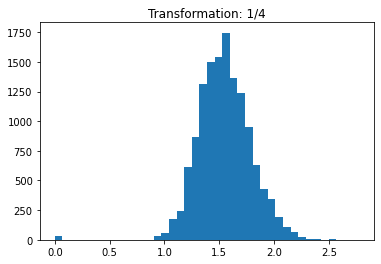

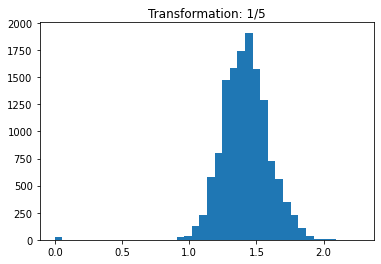

In [33]:
for i in [1,2,3,4,5]:
  pyplot.hist((df['punct%'])**(1/i), bins=40)
  pyplot.title("Transformation: 1/{}".format(str(i)))
  pyplot.show()


In [34]:
def clean_text(text):
  #text = [[words for words in sentences.lower().split()] for sentences in data]
  text="".join([word.lower() for word in text if word not in string.punctuation])

  tokens=re.split('\W+', text)
  #text = [words for words in sentences.lower().split()] for sentences in data]
  text=([ps.stem(word) for word in tokens if word not in stopwords])
  return text

tfidf_vect=TfidfVectorizer(analyzer=clean_text)
x_tfidf = tfidf_vect.fit_transform(df["Text"])

X_features = pd.concat([df['Text'], df['punct%'], pd.DataFrame(x_tfidf.toarray())], axis=1)
X_features.head()

Text  ...  17063
0  @AAlwuhaib1977 Muslim mob violence against Hindus in Bangladesh continues in 2014. #Islam http:/...  ...    0.0
1                                                               @Te4m_NiGhtM4Re http://t.co/5Ih7MkDbQG  ...    0.0
2  @jncatron @isra_jourisra @AMPalestine Islamophobia is like the idea of Naziphobia. Islam is a re...  ...    0.0
3      Finally I'm all caught up, and that sudden death cook off looks like it's gonna be intense #MKR  ...    0.0
4                                                               @carolinesinders @herecomesfran *hugs*  ...    0.0

[5 rows x 17066 columns]

Apply clean text to dataframe and Plot word vectors in a chart and see where they locate

In [35]:
df["tokens"]= df["Text"].apply(clean_text)
df["label_annotatoin"] = df["Annotation"].apply(lambda i:1
                                            if i == "positive" else 0)

df.head(10)

index  ...  label_annotatoin
0  5.767493e+17  ...                 0
1  5.408905e+17  ...                 0
2  5.678433e+17  ...                 0
3  5.766462e+17  ...                 0
4  5.713492e+17  ...                 0
5  5.102409e+17  ...                 0
6  5.588514e+17  ...                 0
7  5.754918e+17  ...                 0
8  5.646041e+17  ...                 0
9  5.633700e+17  ...                 0

[10 rows x 9 columns]

In [36]:
X = df['Text'].tolist()
y = df["oh_label"].tolist()

In [37]:
print(X)
print(y)

['@AAlwuhaib1977 Muslim mob violence against Hindus in Bangladesh continues in 2014. #Islam http://t.co/C1JBWJwuRc', '@Te4m_NiGhtM4Re http://t.co/5Ih7MkDbQG', '@jncatron @isra_jourisra @AMPalestine Islamophobia is like the idea of Naziphobia. Islam is a religion of hate and it must be outlawed.', "Finally I'm all caught up, and that sudden death cook off looks like it's gonna be intense #MKR", '@carolinesinders @herecomesfran *hugs*', 'Please, PLEASE start using "is your discernment blunted by steroids" to mean "are you on DRUGS?" from now on. DEAD', '@aymannathem As soon as ISIS chased all the minorities out of Mosul, the Sunni Arabs were happy to steal their property.  So fuck them.', '@Ali_Gharib @MaxBlumenthal Glad you like it. http://t.co/3ME3Nrk8xZ', '@HuffPostRelig Islam invaded and conquered 2/3 of Christiandom before any Christian crusades in response. The writer is a liar.', '@semzyxx Do you approve of your pedophile prophet raping a 9 year old girl, like it says in 7 hadith?

1. Positive Negative Frenquency
model of text/tokens and their meaning of matching 1/positive/none or 0/negative/racism

In [38]:
#making a 2D vector
corpus = df['tokens']#dimension1

sentiment = df['oh_label']#dimension2

In [39]:
def build_freqs(tokens, oh_label):#take a list and 
  freqs= {}#create empty dictionary
  for Text, oh_label in zip(tokens, oh_label):#loop through the tokens and oh_label as our inputs
    for word in Text:#look through each word in the text
      pair = (word, oh_label)#create table for word and label ex:pedifile, 1
      if pair in freqs:#check if pair exist in dictionary
        freqs[pair] += 1#if exist increment count by 1
      else:
        freqs[pair] = 1#if not add to dictionary with value 1
    return freqs

In [40]:
freqs = build_freqs('tokens', 'oh_label')

In [41]:
print(freqs)

{('t', 'o'): 1}


In [42]:
freqs_all = build_freqs(X, y)#build frequency table with whole dataset

In [43]:
def text_to_freq(text, freqs):#dictionary for new text to see if they appare in the dictionary and if so check to see if they have a positive or negative meaning
  x = np.zeros((2,))
  for word in text:
    if(word, 1) in freqs:
      x[0] += freqs[(word, 1)]
    if (word, 0) in freqs:
      x[1] +=freqs[(word, 0)]
  return x

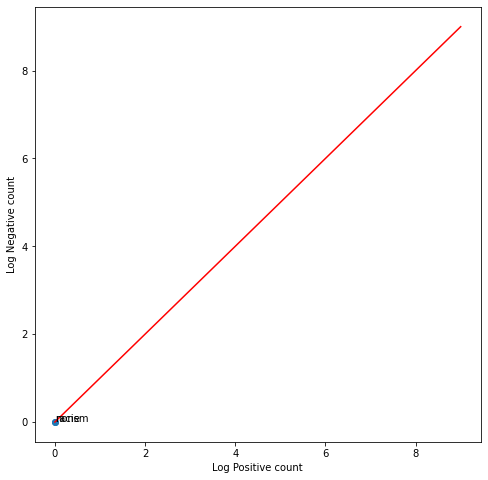

In [44]:
fig, ax = plt.subplots(figsize = (8, 8))#put two words on a graph and compare how often they appear in positive or negative text

word1 = "none"
word2 = "racism"

def word_features(word, freqs):
  x = np.zeros((2,))
  if (word, 1) in freqs:
    x[0] = np.log(freqs[(word, 1)] + 1)
  if (word, 0) in freqs:
    x[1] = np.log(freqs[(word, 0)] + 1)
  return x

x_axis = [word_features(word, freqs_all)[0] for word in [word1, word2]]
y_axis = [word_features(word, freqs_all)[1] for word in [word1, word2]]

ax.scatter(x_axis, y_axis)  

plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

ax.plot([0, 9], [0, 9], color = 'red')
plt.text(x_axis[0], y_axis[0], word1)
plt.text(x_axis[1], y_axis[1], word2)
plt.show()

2. Bag of words: tokenize, words are just words in a bag or bring words into a single intenty

words are then Transformed to a matrix and each word becomes a feature forming different features in a vector, and messages are transferred/Check how many time word appears in a messages matrix=(number of tweets, number of unique words)



* Create a `fit_cv` function used to build the Bag-of-Words vectorizer with the corpus

In [45]:
corpus=df['tokens']

def fit_cv(tokens):
  cv_vect = CountVectorizer(tokenizer=lambda x: x,
                            preprocessor = lambda x: x)
  
  cv_vect.fit(tokens)
  return cv_vect

In [46]:
cv_vect = fit_cv(corpus)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [47]:
ft = cv_vect.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [48]:
print(ft)

['', '0', '000', '01151900', '02', '05', '06jank', '0rwellian', '0xabad1dea', '0xjare', '1', '10', '100', '1000', '10000', '100000', '100000000', '10000teamsleft', '10000x', '1000x', '100k', '100lb', '100month', '100th', '100x', '101', '1010', '1018', '102', '103', '10324830m', '104', '107', '109', '10hr', '10month', '10thousandstepsagain', '10yearold', '11', '110', '1100', '11101903', '115', '117', '12', '120', '120dollarsfood', '1220', '1230', '1233', '12h', '12k', '12year', '12yearold', '12yrold', '13', '1313lilhad', '133', '133133', '14', '140', '1400', '143m', '14600', '14k', '14th', '14yearold', '15', '150', '1500', '150000', '1519', '155', '1561', '157', '15720', '15km', '15ntc', '15th', '16', '1600', '1611', '168', '17', '1700', '17000', '17ok', '17snelson', '18', '180', '1800', '18000', '1801', '184', '19', '19312015', '194', '1947', '1948', '1950', '19597', '1959greenarrow', '1965', '1980', '1987', '1994', '1997', '1999', '1d', '1fatoshn', '1gb', '1hr', '1k', '1lbcake', '1lif

In [49]:
cv_mtx = cv_vect.transform(corpus)#transforming corpus to maxtrix using vectorizing

In [50]:
print("333".format(cv_mtx.shape))

333


In [51]:
cv_mtx.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

3. Term Frequency/Inverse Document frenqueny
how frequently a word apears in each message divided by the number of words in a message

IDF-words that appear less often have more meaning(log(word documents/times word appear in a document
Do the word add meaning to the document

TF*IDF=TF-IDF

TFIDF v Bag of Words= give some value to some words v vectorizing all words in the same way

In [52]:
corpus = df['tokens']#Corpus of tokens

In [53]:
def fit_tfidf(tokens):#Create a `fit_tfidf` function used to build the TF-IDF vectorizer with the 

  tf_vect = TfidfVectorizer(preprocessor= lambda x: x,
                            tokenizer=lambda x: x)
  
  tf_vect.fit(tokens)
  return tf_vect

In [54]:
tf_vect = fit_tfidf(corpus)#Use the `fit_cv` function to fit the vectorizer on the corpus, and transform the corpus
tf_mtx = tf_vect.transform(corpus)
print(tf_mtx.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


(13471, 17064)


In [55]:
ft= tf_vect.get_feature_names()#vectorize features

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [56]:
tf_mtx.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Logistic Regression
Dependent variable v explanetary variable
Used to model binary dependent variable

Xaxis- Explanetary variables Yaxis- prediction of dependent variable(logistic function)binary prediction, 1 positive, racism, it happens; 0 negative, none, it didnt happen

Trying to predict racism
clean up tweets and turn to numbers vectors[positive, negative]set of explanetary variable/set of features thats used to predict sentiment of text

logistic regression turn numbers to a binary prediction=t=linear combination of explanatary variables 

when t is found feed through logistic function to see if its a percent chance of positive or negative



High loss if the prediction is not equal to actual, the prediction will get closer to the actual sentiment/annotation

Training is used to review different examples present in dataset fit data and features using beta coeffieicent

find optimal set of ways and biases so model produces a low lost.

testing measure how well a train model performs

function will be used to plot the confusion matrix for the different models

In [57]:
import seaborn as sn

def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn
print(X)
print(y)

['@AAlwuhaib1977 Muslim mob violence against Hindus in Bangladesh continues in 2014. #Islam http://t.co/C1JBWJwuRc', '@Te4m_NiGhtM4Re http://t.co/5Ih7MkDbQG', '@jncatron @isra_jourisra @AMPalestine Islamophobia is like the idea of Naziphobia. Islam is a religion of hate and it must be outlawed.', "Finally I'm all caught up, and that sudden death cook off looks like it's gonna be intense #MKR", '@carolinesinders @herecomesfran *hugs*', 'Please, PLEASE start using "is your discernment blunted by steroids" to mean "are you on DRUGS?" from now on. DEAD', '@aymannathem As soon as ISIS chased all the minorities out of Mosul, the Sunni Arabs were happy to steal their property.  So fuck them.', '@Ali_Gharib @MaxBlumenthal Glad you like it. http://t.co/3ME3Nrk8xZ', '@HuffPostRelig Islam invaded and conquered 2/3 of Christiandom before any Christian crusades in response. The writer is a liar.', '@semzyxx Do you approve of your pedophile prophet raping a 9 year old girl, like it says in 7 hadith?

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    train_size = 0.80)

In [60]:
print("Size of X_train: {}".format(len(X_train)))
print("Size of y_train: {}".format(len(y_train)))
print("\n")
print("Size of X_test: {}".format(len(X_test)))
print("Size of y_test: {}".format(len(y_test)))
print("\n")
print("Train proportion: {:.0%}".format(len(X_train)/
                                        (len(X_train)+len(X_test))))

Size of X_train: 10776
Size of y_train: 10776


Size of X_test: 2695
Size of y_test: 2695


Train proportion: 80%


In [61]:
def fit_lr(X_train, y_train):
  model = LogisticRegression()
  model.fit(X_train, y_train)
  return model

Models

In [62]:
from sklearn.linear_model import LogisticRegression
def fit_lr(X_train, y_train):
  model = LogisticRegression()
  model.fit(X_train, y_train)
  return model
#freqs= build_freqs(X_train, y_train)
#X_train_pn = [tokens(tokens, freqs) for tokens in X_train]
#X_test_pn = [tokens_to_freq(tokens, freqs) for tokens in X_test]

Train Pos/Frequency model

In [63]:
freqs= build_freqs(X_train, y_train)
X_train_pn = [text_to_freq(tokens, freqs) for tokens in X_train]
X_test_pn = [text_to_freq(tokens, freqs) for tokens in X_test]
model_lr_tf_pn = fit_lr(X_train_pn, y_train)
print(model_lr_tf_pn.coef_, model_lr_tf_pn.intercept_)

[[0.         0.00353283]] [-4.27647965]


Count Vectorizer

In [64]:
cv=fit_cv(X_train)
X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [65]:
model_lr_cv= fit_lr(X_train_cv, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Term Frequency

In [66]:
tf = fit_tfidf(X_train)
X_train_tf =tf.transform(X_train)
X_test_tf= tf.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [67]:
model_lr_tf=fit_lr(X_train_tf, y_train)

Performance metrics

In [68]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Positvie negative frequencies

In [69]:
y_pred_lr_pn = model_lr_tf_pn.predict(X_test_pn)


In [70]:
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_pn)))

LR Model Accuracy: 85.45%


<module 'seaborn' from '/usr/local/lib/python3.7/dist-packages/seaborn/__init__.py'>

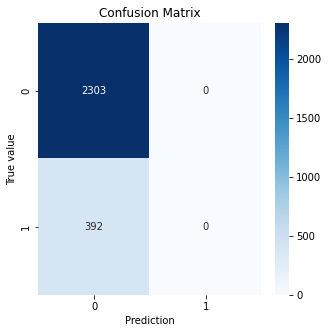

In [71]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_pn))

Count Vectorizer Model

In [72]:
y_pred_lr_cv = model_lr_tf.predict(X_test_tf)

In [73]:
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_cv)))

LR Model Accuracy: 88.35%


<module 'seaborn' from '/usr/local/lib/python3.7/dist-packages/seaborn/__init__.py'>

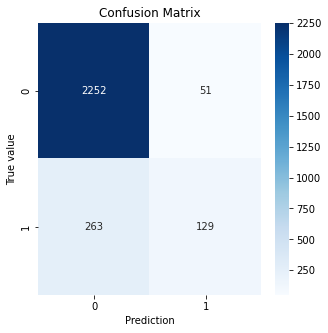

In [74]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_cv))

TF/IDF

In [75]:
y_pred_lr_tf = model_lr_tf.predict(X_test_tf)

In [76]:
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_tf)))

LR Model Accuracy: 88.35%


<module 'seaborn' from '/usr/local/lib/python3.7/dist-packages/seaborn/__init__.py'>

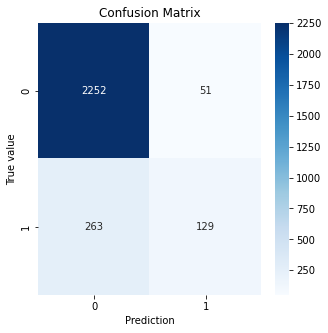

In [77]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_tf))

In [78]:
import emoji
import contractions

def process_tweet(text, verbose=False):
  if verbose: print("Initial tweet: {}".format(tweet))

  ## Twitter Features
    # replace retweet
def replace_retweet(text, default_replace=""):
  text= re.sub('RT\s', default_replace, tweet)
  return text
    # replace user tag
def replace_user(text, default_replace="twitteruser"):
  text= re.sub('\B@\w+', default_replace, tweet)
  return text
    # replace url
def replace_url(text, default_replace=""):
  text = re.sub('(http|https):\/\/\S+', default_replace, tweet)
  return text
    # replace hashtag
def replace_hashtag(text, default_replace=""):
  text = re.sub('#+', default_replace, tweet)
  return text

  if verbose: print("Post Twitter processing tweet: {}".format(tweet))

  ## Word Features
    # lower case
def to_lowercase(text):
  text = text.lower()
  return text
    # replace contractions
def fix_contractions(text):
  text = contractions.fix(text)
  return text
    # replace punctuation repetition
def punct_repetition(tweet, default_replace=""):
  text=re.sub(r'[\?\.\!]+(?=[\?]\.\!)', default_replace, tweet)
  return text
    # replace word repetition
def word_repetition(tweet):
  text = re.sub(r'(.)\1+', r'\1\1', text)
  return text
    # replace emojis
def demojize(tweet):
  text = emoji.demojize(text)
  return text
  if verbose: print("Post Word processing tweet: {}".format(text))

  ## Tokenization & Stemming
    # tokenize
def tokenize(text):
  tokens = word_tokenize(text)
  return text
    # define stemmer
def stem_tokens(text, stemmer):
  token_list =[]
  for token in tokens:
    token_list.append(stemmer.stem(token))
  return token_list
    # stem tokens

  return stem

ModuleNotFoundError: ignored

In [ ]:
print(process_tweet(complex_tweet, verbose=False))

In [ ]:
#import string

#def count_profanity(text):
  #count=sum([1 for char in text if char in censored])
  #return round(count/(len(text)-text.count('  ')), 3)*100     #percentage of text messagees that are punctation

#df['Bad Word']= df['clean_text'].apply(lambda x: count_profanity(x))

#df['Bad Word'].head()



Find random messages and apply 

In [ ]:
import random

In [ ]:
for i in range(5):
  tweet_id = random.randint(0,len(df))
  tweet = df.iloc[tweet_id]["Text"]
  print(process_tweet(tweet, verbose=True))
  print("\n")

In [ ]:
pip install -U scikit-learn

In [ ]:
df["tokens"]= df["Text"].apply(process_tweet)
df["tweet_sentiment"] = df["Bad Word"].apply(lambda i:1
                                            if i == "positive" else 0)

df.head(10)

In [ ]:
#def clean_test(text):
  #remove punctuation and convert all strings to lower
  #text = "".join([word.lower() for word in text if word not in strings.punctuation])
  #tokenize with Regex
  #tokens=re.split('\W+', text)

#remove stopwords and covert all words into their stems

  #text=[ps.stem(word) for word in tokens if word not in stopwords]
  #return text


Clean Text- removing stopwords/Punctuation and stemming

In [ ]:
def build_freqs(text_list, oh_label_list):
  freqs= {}
  for tweet, sentiment in zip(text_list, oh_label_list):
    for word in tweet:
      pair = (word, sentiment)
      if pair in freqs:
        freqs[pair] += 1
      else:
        freqs[pair] = 1
    return freqs


Create a text_to_freq function used to convert text to a 2-d array by using frequency dictionary

print 2-d vector using text_to_freqs function and corpus

Plot word vectors in chart to see location

Corpus of tweet tokens used for the second method

Import CountVectorizer and create fit_cv function used to build bag of words vectorizer

Vectorizing- converting to numberical form

In [ ]:
#Counting 
from sklearn.feature_extraction.text import CountVectorizer

count_vect=CountVectorizer(analyzer=clean_text)
X_counts=count_vect.fit_transform(data['User Names'])
print(X_counts.shape)
print(count_vect.get_feature_names())

In [ ]:
#apply to small sample

data_sample= data[0:20]

count_vect_sample=CountVectorizer(analyzer=clean_text)
count_vect=CountVectorizer(analyzer=clean_text)
X_count_sample=count_vect_sample.fit_transform(data['User Names'])
print(X_count_sample.shape)
print(count_vect_sample.get_feature_names())

In [ ]:
X_count_sample

In [ ]:
X_count_df=pd.DataFrame(X_count_sample.toarray())
X_count_df

In [ ]:
#data.columns=['Names+tweet', 'clean text']
def clean_text(text):
  text="".join([word.lower() for word in text if word not in string.punctuation])
  tokens=re.split('\W+', text)
  #text=" ".join([ps.stem(word) for word in tokens if word not in stopwords])
  return text

data['clean_text'] = data['User Names'].apply(lambda x: clean_text(x))
data.head()
